In [1]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!git clone https://github.com/thangnch/MIAI_DecisionTree.git

Cloning into 'MIAI_DecisionTree'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 13.28 MiB | 13.37 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [7]:
# load data
df = pd.read_csv('/content/MIAI_DecisionTree/data.csv')
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [9]:
df['Classification'] -= 1
df['Classification'].value_counts()

,count
Classification,
1,64
0,52


In [10]:
y = df['Classification'].values.reshape(-1, 1)
X = df.drop('Classification', axis=1)

print(X.shape)
print(y.shape)

(116, 9)
(116, 1)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.metrics import plot_confusion_matrix

model = DecisionTreeClassifier(max_depth=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[ 9  3]
 [ 2 10]]


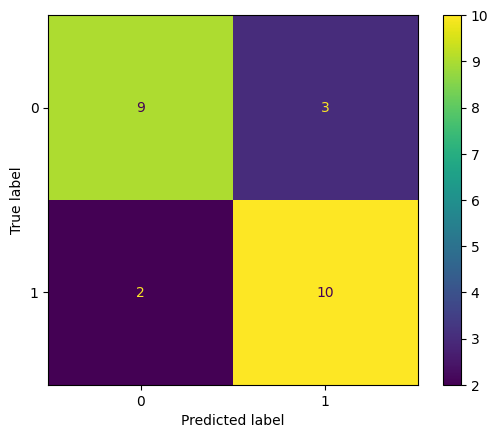

In [23]:
disp = ConfusionMatrixDisplay(cf_matrix, display_labels=['0', '1'])
disp.plot()
plt.show()

In [24]:
df = pd.read_csv('/content/MIAI_DecisionTree/datareg.csv')
df.head()

,Product,Cost,Profit
0,'Asset Flip',100,1000
1,'Text Based',500,3000
2,'Visual Novel',1500,5000
3,'2D Pixel Art',3500,8000
4,'2D Vector Art',5000,6500


In [27]:
X = df['Cost'].values.reshape(-1, 1)
y = df['Profit'].values.reshape(-1, 1)

print(X.shape)
print(y.shape)

(14, 1)
(14, 1)


In [32]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)
model.fit(X, y)


DecisionTreeRegressor(max_depth=5)

In [33]:
X_test = [[4500]]
y_pred = model.predict(X_test)
print(y_pred)

[6750.]


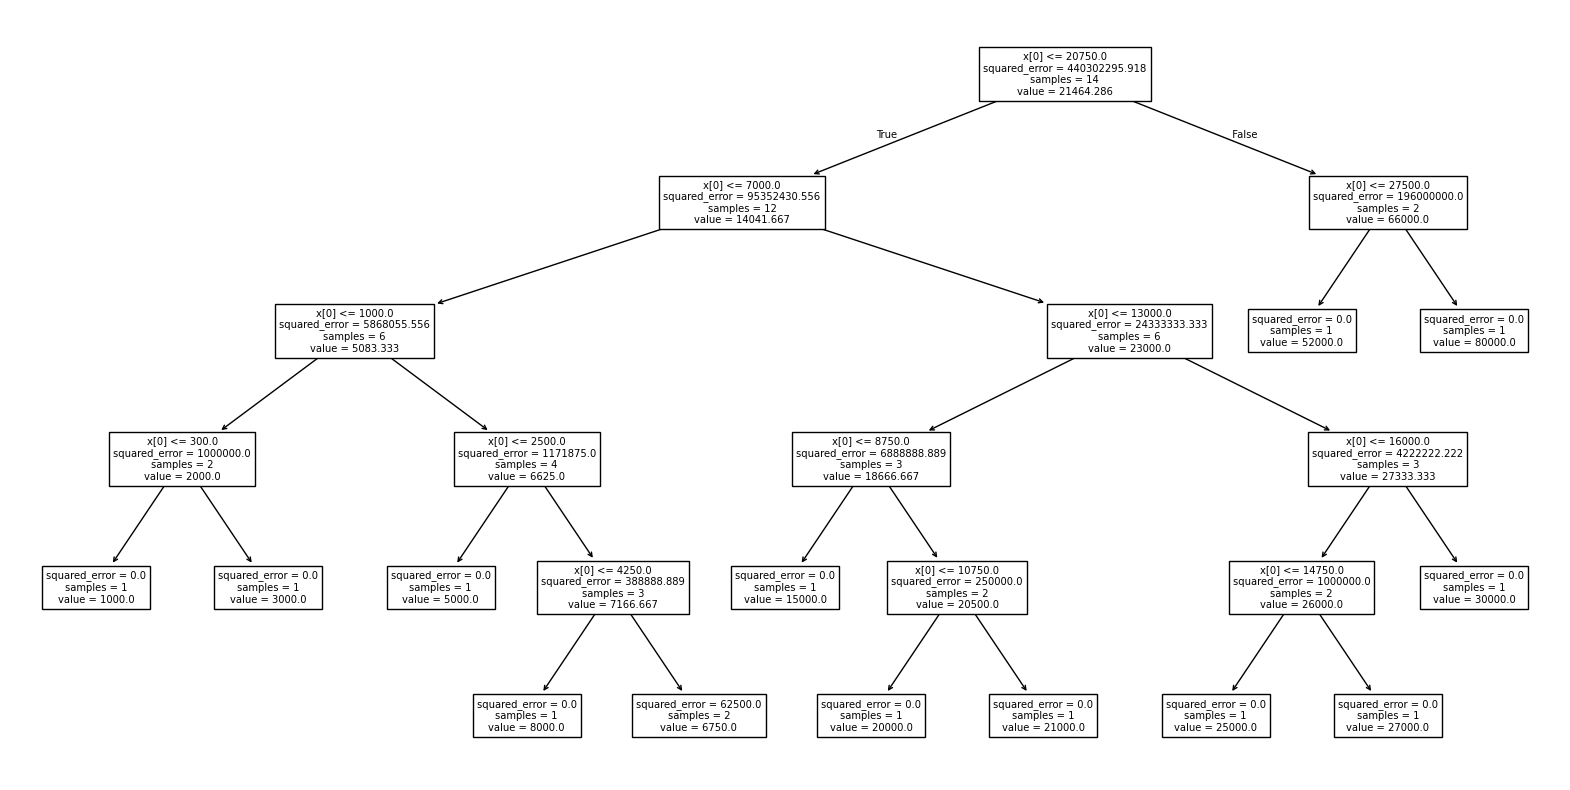

In [36]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model)
plt.show()